In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf # yahoo finance مكتبة لتحميل الأوراق المالية من موقع  



In [2]:
start = dt.datetime(2021,1,1)
end = dt.datetime(2022,1,1)
data = yf.download('AAPL',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.874954,143301900
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455963,97664900
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098267,155088000
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367020,109578200
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483612,105158200
...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289459,74919600
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255432,79144300
2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900


In [4]:
high_low = data['High'] - data['Low'] # الفرق بين أعلى سعر وأقل سعر 
high_c = np.abs(data['High'] - data['Close'].shift(1)) # الفرق بين أعلى سعر وقيمة الإغلاق في اليوم السابق
low_c = np.abs(data['Low'] - data['Close'].shift(1)) # الفرق بين أدنى سعر وقيمة الإغلاق في اليوم السابق

In [5]:
high_c

Date
2021-01-04 00:00:00-05:00         NaN
2021-01-05 00:00:00-05:00    2.330002
2021-01-06 00:00:00-05:00    0.040009
2021-01-07 00:00:00-05:00    5.030006
2021-01-08 00:00:00-05:00    1.710007
                               ...   
2021-12-27 00:00:00-05:00    4.139999
2021-12-28 00:00:00-05:00    1.000000
2021-12-29 00:00:00-05:00    1.340012
2021-12-30 00:00:00-05:00    1.190002
2021-12-31 00:00:00-05:00    1.029999
Length: 252, dtype: float64

In [6]:
df = pd.concat([high_low,high_c,low_c],keys=['high_low','high_c','low_c'],axis =1 )

In [7]:
df

,high_low,high_c,low_c
Date,,,
2021-01-04 00:00:00-05:00,6.849998,NaN,NaN
2021-01-05 00:00:00-05:00,3.310013,2.330002,0.980011
2021-01-06 00:00:00-05:00,4.670006,0.040009,4.629997
2021-01-07 00:00:00-05:00,3.770004,5.030006,1.260002
2021-01-08 00:00:00-05:00,2.400009,1.710007,0.690002
...,...,...,...
2021-12-27 00:00:00-05:00,3.349991,4.139999,0.790009
2021-12-28 00:00:00-05:00,2.800003,1.000000,1.800003
2021-12-29 00:00:00-05:00,2.490005,1.340012,1.149994


In [8]:
true_range = np.max(df,axis = 1) # حساب المدى الحقيقي

In [9]:
true_range

Date
2021-01-04 00:00:00-05:00    6.849998
2021-01-05 00:00:00-05:00    3.310013
2021-01-06 00:00:00-05:00    4.670006
2021-01-07 00:00:00-05:00    5.030006
2021-01-08 00:00:00-05:00    2.400009
                               ...   
2021-12-27 00:00:00-05:00    4.139999
2021-12-28 00:00:00-05:00    2.800003
2021-12-29 00:00:00-05:00    2.490005
2021-12-30 00:00:00-05:00    2.480011
2021-12-31 00:00:00-05:00    1.970001
Length: 252, dtype: float64

In [10]:
# متوسط المدى الحقيقي
average_true_range = true_range.rolling(14).mean()

In [11]:
# ATR مؤشر يدل على تقلبات الأسعار 
# من خلاله نعرف مدى ملاءمة الصفقة 
# مدى الأسعار هو الفرق بين الأسعار المنخفضة والمرتفعة
#  وجب البيع يأفضل سعر ATR مدى الأسعار أعلى من  
#  وجب الشراء بأفضل سعر ATR مدى الأسعار أقل من  
average_true_range

Date
2021-01-04 00:00:00-05:00         NaN
2021-01-05 00:00:00-05:00         NaN
2021-01-06 00:00:00-05:00         NaN
2021-01-07 00:00:00-05:00         NaN
2021-01-08 00:00:00-05:00         NaN
                               ...   
2021-12-27 00:00:00-05:00    5.007144
2021-12-28 00:00:00-05:00    4.760002
2021-12-29 00:00:00-05:00    4.562145
2021-12-30 00:00:00-05:00    4.537145
2021-12-31 00:00:00-05:00    4.315716
Length: 252, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


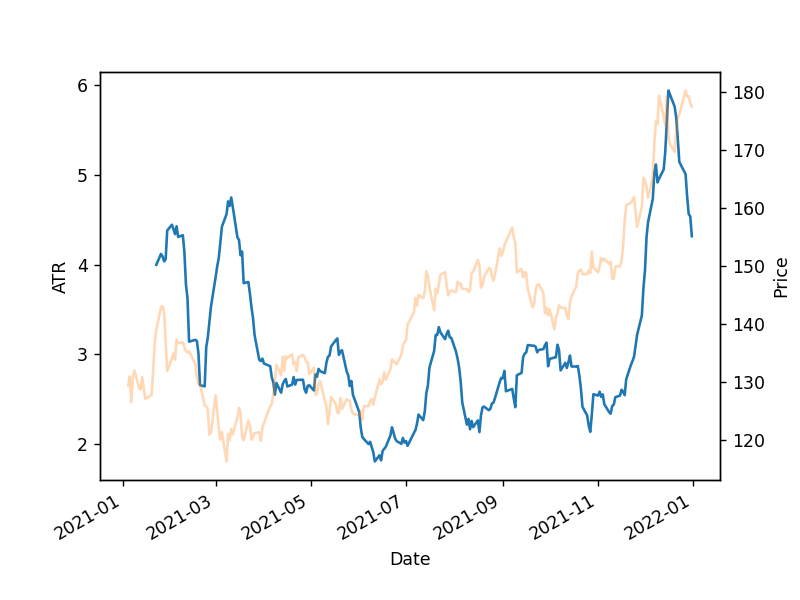

Text(0, 0.5, 'Price')

In [13]:
fig,ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax,secondary_y = True,alpha = 0.3)
ax.set_ylabel('ATR')
ax2.set_ylabel('Price')

In [16]:
tickers = ['AAPL','MSFT','NVDA','AMZN']
start = dt.datetime(2022,1,1)
data = yf.download(tickers,start=start)

[*********************100%***********************]  4 of 4 completed


In [17]:
data.head()

Adj Close                                      \
                                 AAPL        AMZN        MSFT        NVDA   
Date                                                                        
2022-01-03 00:00:00-05:00  180.959747  170.404495  331.642487  300.928589   
2022-01-04 00:00:00-05:00  178.663086  167.522003  325.955780  292.626373   
2022-01-05 00:00:00-05:00  173.910660  164.356995  313.443024  275.782135   
2022-01-06 00:00:00-05:00  171.007507  163.253998  310.966187  281.516754   
2022-01-07 00:00:00-05:00  171.176529  162.554001  311.124725  272.215454   

                                Close                                      \
                                 AAPL        AMZN        MSFT        NVDA   
Date                                                                        
2022-01-03 00:00:00-05:00  182.009995  170.404495  334.750000  301.209991   
2022-01-04 00:00:00-05:00  179.699997  167.522003  329.010010  292.899994   
2022-01-05 00:00:00-05:00  174.919998  164.356995  316.380005  276.040009   
2022-01-06 00:00:00-05:00  172.000000  163.253998  313.880005  281.779999   
2022-01-07 00:00:00-05:00  172.169998  162.554001  314.040009  272.470001   

                                 High              ...         Low  \
                                 AAPL        AMZN  ...        MSFT   
Date                                               ...               
2022-01-03 00:00:00-05:00  182.880005  170.703506  ...  329.779999   
2022-01-04 00:00:00-05:00  182.940002  171.399994  ...  326.119995   
2022-01-05 00:00:00-05:00  180.169998  167.126495  ...  315.980011   
2022-01-06 00:00:00-05:00  175.300003  164.800003  ...  311.489990   
2022-01-07 00:00:00-05:00  174.139999  165.243500  ...  310.089996   

                                             Open                          \
                                 NVDA        AAPL        AMZN        MSFT   
Date                                                                        
2022-01-03 00:00:00-05:00  297.850006  177.830002  167.550003  335.350006   
2022-01-04 00:00:00-05:00  283.489990  182.630005  170.438004  334.829987   
2022-01-05 00:00:00-05:00  275.329987  179.610001  166.882996  325.859985   
2022-01-06 00:00:00-05:00  270.649994  172.699997  163.450500  313.149994   
2022-01-07 00:00:00-05:00  270.570007  172.889999  163.839005  314.149994   

                                          Volume                                
                                 NVDA       AAPL      AMZN      MSFT      NVDA  
Date                                                                            
2022-01-03 00:00:00-05:00  298.149994  104487900  63520000  28865100  39154700  
2022-01-04 00:00:00-05:00  302.769989   99310400  70726000  32674300  52715400  
2022-01-05 00:00:00-05:00  289.489990   94537600  64302000  40054300  49806400  
2022-01-06 00:00:00-05:00  276.399994   96904000  51958000  39646100  45418600  
2022-01-07 00:00:00-05:00  281.410004   86709100  46606000  32720000  40993900  

[5 rows x 24 columns]

In [18]:
data = data['Adj Close']

In [19]:
data

,AAPL,AMZN,MSFT,NVDA
Date,,,,
2022-01-03 00:00:00-05:00,180.959747,170.404495,331.642487,300.928589
2022-01-04 00:00:00-05:00,178.663086,167.522003,325.955780,292.626373
2022-01-05 00:00:00-05:00,173.910660,164.356995,313.443024,275.782135
2022-01-06 00:00:00-05:00,171.007507,163.253998,310.966187,281.516754
2022-01-07 00:00:00-05:00,171.176529,162.554001,311.124725,272.215454
...,...,...,...,...
2022-12-19 00:00:00-05:00,132.369995,84.919998,240.449997,162.539993
2022-12-20 00:00:00-05:00,132.300003,85.190002,241.800003,160.850006
2022-12-21 00:00:00-05:00,135.449997,86.769997,244.429993,165.009995


In [20]:
portfolio = [.25,.15,.40,.20] # تعريف محفظة 

In [21]:
np.sum(portfolio) # مجموعها 1 

1.0

In [22]:
np.log(data/data.shift()) # نبدء بحساب الإرجاع اليومي بالنسبة للمحفظة 

,AAPL,AMZN,MSFT,NVDA
Date,,,,
2022-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,-0.012773,-0.017060,-0.017296,-0.027976
2022-01-05 00:00:00-05:00,-0.026960,-0.019074,-0.039144,-0.059285
2022-01-06 00:00:00-05:00,-0.016834,-0.006734,-0.007933,0.020581
2022-01-07 00:00:00-05:00,0.000988,-0.004297,0.000510,-0.033598
...,...,...,...,...
2022-12-19 00:00:00-05:00,-0.016038,-0.034035,-0.017480,-0.019315
2022-12-20 00:00:00-05:00,-0.000529,0.003174,0.005599,-0.010452
2022-12-21 00:00:00-05:00,0.023530,0.018377,0.010818,0.025534


In [23]:
np.sum(np.log(data/data.shift()),axis= 1 )  # نبدء بحساب الإرجاع اليومي بالنسبة للمحفظة 

Date
2022-01-03 00:00:00-05:00    0.000000
2022-01-04 00:00:00-05:00   -0.075105
2022-01-05 00:00:00-05:00   -0.144464
2022-01-06 00:00:00-05:00   -0.010921
2022-01-07 00:00:00-05:00   -0.036398
                               ...   
2022-12-19 00:00:00-05:00   -0.086868
2022-12-20 00:00:00-05:00   -0.002207
2022-12-21 00:00:00-05:00    0.078259
2022-12-22 00:00:00-05:00   -0.157890
2022-12-23 00:00:00-05:00    0.008028
Length: 247, dtype: float64

In [24]:
# يجب أن نضرب بقيمة المحفظة قبل جمع الإرجاع في كل سوق لانها تدل على حصة السوق في المحفظة 
log_return = np.sum(np.log(data/data.shift())*portfolio,axis= 1 ) 
log_return

Date
2022-01-03 00:00:00-05:00    0.000000
2022-01-04 00:00:00-05:00   -0.018266
2022-01-05 00:00:00-05:00   -0.037116
2022-01-06 00:00:00-05:00   -0.004276
2022-01-07 00:00:00-05:00   -0.006913
                               ...   
2022-12-19 00:00:00-05:00   -0.019970
2022-12-20 00:00:00-05:00    0.000493
2022-12-21 00:00:00-05:00    0.018073
2022-12-22 00:00:00-05:00   -0.036206
2022-12-23 00:00:00-05:00    0.001055
Length: 247, dtype: float64

<IPython.core.display.Javascript object>


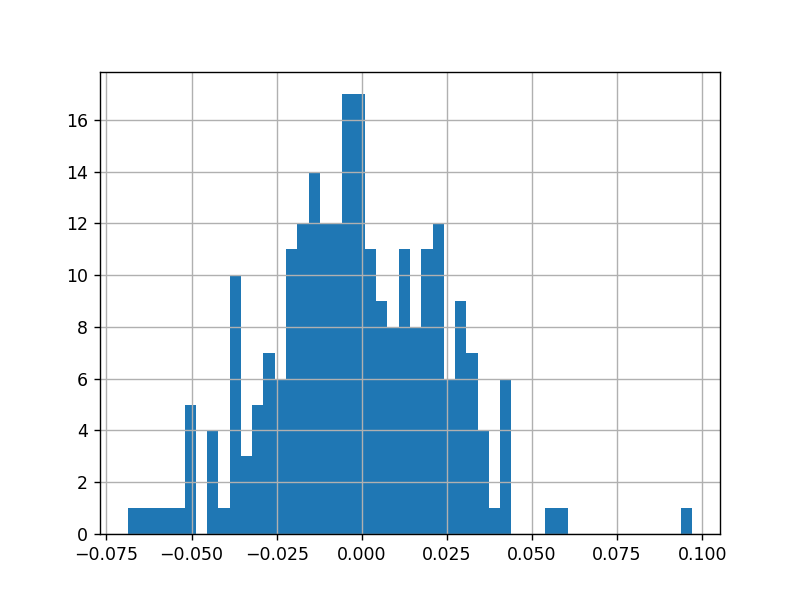

<AxesSubplot:>

In [25]:
fig ,ax = plt.subplots()
log_return.hist(ax=ax ,bins= 50)

In [26]:
log_return.std() # الإنحراف المعياري للمحفظة  

0.024765759649966246

In [27]:
#   نسبة شارب التى تقيس مقدار المخاطرة التى تتعرض لها محفظتك للحصول على عائد معين  
# كلما زاد الإنجراف المعياري للمحفظة زادت مقدار المخاطرة 
sharpe_ratio = log_return.mean() / log_return.std()

In [28]:
sharpe_ratio # القيمة هذه لانستطيع التعامل معها 

-0.07373226841308327

In [31]:
# هذه القيمة التى نستطيع التعامل معها 
# أقل من الواحد سيئة 
# بين 1و2 جيدة 
# بين 2و3 جيدة جدا
# أكثر من ثلاثة ممتازة
# أي كلما زادت القيمة قل مقدار المخاطرة 
analysis_sr = sharpe_ratio*252**.5
analysis_sr

-1.1704634749300882

In [32]:
# إنشاء محفظة عشوائية
weight = np.random.random(4)
weight /= weight.sum()

In [33]:
log_return2 = np.sum(np.log(data/data.shift())*weight,axis= 1 )

In [34]:
sharpe_ratio2 = log_return2.mean() / log_return2.std()

In [35]:
analysis_sr2 = sharpe_ratio2*252**.5
analysis_sr2

-1.2725645112763073